In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns

In [9]:
df = pd.read_csv('data/preprocessed_commercial_area.csv')

In [10]:
df['2022 소득분위'] = df['2022 소득분위'].apply(lambda x:int(x[0]))

In [11]:
# ['음식점','카페','프랜차이즈','호프']
category = '음식점'
k = 5


if category == '음식점':
    df2 = df[[column for column in df.columns if any(category in column for category in ('한식','중식','일식','양식'))]].copy()
    
common = df[[column for column in df.columns if not any(category in column for category in ('외식업','서비스업','소매업'))]].copy()
df2 = pd.concat([common,df2],axis=1)

# 결측치
df2.fillna(0,inplace=True)
df2 = df2.apply(lambda x:x.replace(float('inf'),0))

# kmeans clustering
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df2.iloc[:,2:]))
kmeans = KMeans(n_clusters=k,n_init=10)
kmeans.fit(scaled_df)
df3 = df2.copy()
df3['label'] = kmeans.labels_

ranked = df3.iloc[:,2:].groupby(['label']).mean().rank().T

for label in range(k):
    tmp = ranked.loc[:,[label]]
    print(f'{k} 중 {label}번째 군집에서 값이 가장 큰 컬럼')
    pprint(tmp[tmp[label]==1].index.tolist())
    print()


5 중 0번째 군집에서 값이 가장 큰 컬럼
['2022 소득분위 등급',
 '전체 점포수 외식업 한식음식점 변화율',
 '프렌차이즈 점포수 외식업 한식음식점 변화율',
 '2022 최근 10년기준 외식업 일식음식점 등급',
 '2022 최근 10년기준 외식업 양식음식점 등급']

5 중 1번째 군집에서 값이 가장 큰 컬럼
['2022 길단위 유동인구',
 '2022 가구수',
 '환산임대료 전체 변화율',
 '2022 전체 점포수 외식업 한식음식점',
 '2022 프렌차이즈 점포수 외식업 한식음식점',
 '2022 일반 점포수 외식업 한식음식점',
 '2022 전체 점포수 외식업 중식음식점',
 '2022 프렌차이즈 점포수 외식업 중식음식점',
 '2022 일반 점포수 외식업 중식음식점',
 '2022 전체 점포수 외식업 일식음식점',
 '전체 점포수 외식업 일식음식점 변화율',
 '2022 프렌차이즈 점포수 외식업 일식음식점',
 '프렌차이즈 점포수 외식업 일식음식점 변화율',
 '2022 신생기업 1년 생존율 외식업 한식음식점',
 '2022 신생기업 1년 생존율 외식업 중식음식점',
 '2022 신생기업 3년 생존율 외식업 중식음식점',
 '2022 신생기업 5년 생존율 외식업 중식음식점',
 '2022 신생기업 1년 생존율 외식업 일식음식점',
 '2022 신생기업 3년 생존율 외식업 일식음식점',
 '2022 신생기업 1년 생존율 외식업 양식음식점',
 '2022 신생기업 3년 생존율 외식업 양식음식점',
 '2022 신생기업 5년 생존율 외식업 양식음식점',
 '2022 최근 10년기준 외식업 한식음식점 등급',
 '2022 최근 10년기준 외식업 중식음식점 등급',
 '2022 개업수 외식업 한식음식점',
 '2022 폐업수 외식업 한식음식점',
 '2022 개업률 외식업 한식음식점',
 '2022 폐업률 외식업 한식음식점',
 '2022 개업수 외식업 중식음식점',
 '2022 폐업수 외식업 중식음식점',
 '2022 개업률 외식업 중식음식점',

# Find Optimal K (silhouette score)

In [12]:
def visualize_silhouette_layer(data,n_init=10):
    clusters_range = range(3,10)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i,n_init=n_init,random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

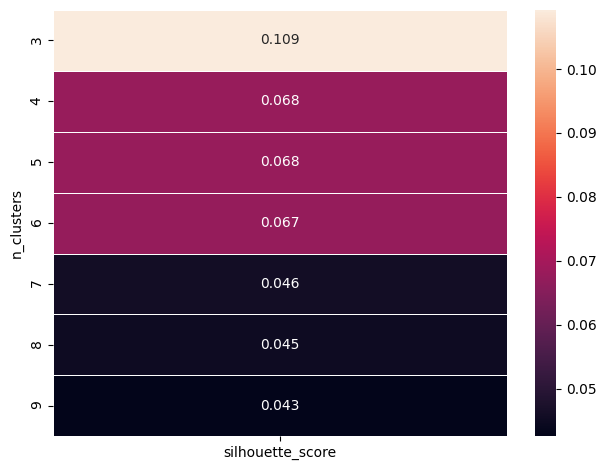

In [13]:
visualize_silhouette_layer(scaled_df)